In [3]:
from keras.models import load_model
from librosa.feature import melspectrogram
import matplotlib.pyplot as plt
%matplotlib inline

num_to_labels_emotion_audio=np.load('num_to_labels_emotion_audio.npy').item()
audio_emotion_model=load_model('model_checkpoint_combinedfeatures_ravdess_savdee54_60.h5')
audio_emotion_model.summary()
def get_emotion_audio(audio,sr):
    print(audio)
    print(sr)
    S = melspectrogram(audio.astype('float32'), sr=sr)
    S = 10 * np.log(S + 1e-15)
    S=np.expand_dims(S,axis=0)
    
    S=np.expand_dims(S,axis=3)
    print(S.shape)
    emotion=num_to_labels_emotion_audio[np.argmax(audio_emotion_model.predict(S))]
    print(emotion)
    return emotion


num_to_labels_classify_audio=np.load('num_to_labels_audio_classify.npy').item()
audio_classify_model=load_model('model_checkpoint_combinedfeatures_ravdess_savdee54_60.h5')
#audio_classify_model.summary()

def get_audio_classification(audio,sr):
    print(audio)
    print(sr)
    S = melspectrogram(audio.astype('float32'), sr=sr)
    S = 10 * np.log(S + 1e-15)
    plt.imshow(S)
    
    S=np.expand_dims(S,axis=0)
    S=np.expand_dims(S,axis=3)
    #print(S.shape)
    predicted_prob=audio_classify_model.predict(S)
    audio_classes=num_to_labels_classify_audio[np.argmax(predicted_prob)]
    print(predicted_prob)
    return audio_classes

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 94, 1)   0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 110, 76, 32)  11584       input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_11 (MaxPooling2D) (None, 55, 38, 32)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 55, 38, 32)   128         max_pooling2d_11[0][0]           
__________________________________________________________________________________________________
conv2d_16 

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[   0    0   -1 ... 3256 3449 3613]
16000
[[1. 0. 0. 0. 0. 0. 0.]]
[DETECTED AUDIO CLASS]  dog
Empty room


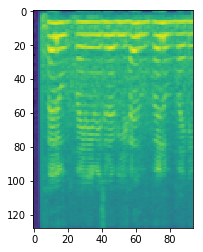

In [5]:
import pyaudio
import numpy as np
import sounddevice as sd
import librosa
CHUNK = 48000 # number of data points to read at a time
RATE = 16000 # time resolution of the recording device (Hz)

p=pyaudio.PyAudio() # start the PyAudio class
stream=p.open(format=pyaudio.paInt16,channels=1,rate=RATE,input=True,
              frames_per_buffer=CHUNK) #uses default input device

# create a numpy array holding a single read of audio data
stop=0
suspicious_sounds=['vacuum_cleaner','door_wood_knock','fireworks','chainsaw','crackling_fire','engine','hand_saw','glass_breaking','siren']
    
human_presence_classes=['clapping','mouse_click','laughing','keyboard_typing','footsteps','brushing_teeth','drinking_sipping','breathing','crying_baby','coughing','snoring','sneezing']
    
while not stop: #to it a few times just to see
    #print('Recording')
    audio=np.fromstring(stream.read(CHUNK),dtype=np.int16)
    
    #sd.play(audio,RATE)
    #S = librosa.feature.melspectrogram(audio.astype('float32'), sr=RATE)
    #S = 10 * np.log(S + 1e-15)
    audio_classes=get_audio_classification(audio,RATE)
    print("[DETECTED AUDIO CLASS] ",audio_classes)
    
    
    if audio_classes in human_presence_classes:
        print('Human Presense detected')
        #em=get_emotion_audio(audio,RATE)
        #print("[DETECTED EMOTION] ",em)
    elif audio_classes in suspicious_sounds:
        print('[ALERT]  Suspicious sound....',audio_classes)
    else:
        print("Empty room")
    
    
    stop=1 
# close the stream gracefully
stream.stop_stream()
stream.close()
p.terminate()